In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [2]:
full = Table.read_table('NC-EST2014-AGESEX-RES.csv')
full

SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014
0,0,3944153,3944160,3951330,3963071,3926665,3945610,3948350
0,1,3978070,3978090,3957888,3966510,3978006,3943077,3962123
0,2,4096929,4096939,4090862,3971573,3979952,3992690,3957772
0,3,4119040,4119051,4111920,4102501,3983049,3992425,4005190
0,4,4063170,4063186,4077552,4122303,4112638,3994047,4003448
0,5,4056858,4056872,4064653,4087713,4132210,4123408,4004858
0,6,4066381,4066412,4073013,4074979,4097780,4143094,4134352
0,7,4030579,4030594,4043047,4083240,4084964,4108615,4154000
0,8,4046486,4046497,4025604,4053206,4093213,4095827,4119524
0,9,4148353,4148369,4125415,4035769,4063193,4104133,4106832


In [3]:
full.where(1, 0)

SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014
0,0,3944153,3944160,3951330,3963071,3926665,3945610,3948350
1,0,2014276,2014278,2018420,2028434,2007693,2015537,2017857
2,0,1929877,1929882,1932910,1934637,1918972,1930073,1930493


In [4]:
partial = full.select(['SEX', 'AGE', 4, 8])
partial

SEX,AGE,POPESTIMATE2010,POPESTIMATE2014
0,0,3951330,3948350
0,1,3957888,3962123
0,2,4090862,3957772
0,3,4111920,4005190
0,4,4077552,4003448
0,5,4064653,4004858
0,6,4073013,4134352
0,7,4043047,4154000
0,8,4025604,4119524
0,9,4125415,4106832


In [5]:
simple = partial.relabeled('POPESTIMATE2010', '2010').relabeled(3, '2014')
simple

SEX,AGE,2010,2014
0,0,3951330,3948350
0,1,3957888,3962123
0,2,4090862,3957772
0,3,4111920,4005190
0,4,4077552,4003448
0,5,4064653,4004858
0,6,4073013,4134352
0,7,4043047,4154000
0,8,4025604,4119524
0,9,4125415,4106832


In [6]:
partial.column("AGE")

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 999,   0,   1,
         2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
        15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
        41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  7

In [7]:
partial.where('AGE', 999)

SEX,AGE,POPESTIMATE2010,POPESTIMATE2014
0,999,309347057,318857056
1,999,152089484,156936487
2,999,157257573,161920569


In [8]:
#which age groups have the most changes in population?
census = simple.with_columns(
        'Change', simple.column(3) - simple.column(2), 
        'Growth', (simple.column(3) / simple.column(2)) ** (1/4) - 1)
census

SEX,AGE,2010,2014,Change,Growth
0,0,3951330,3948350,-2980,-0.000188597
0,1,3957888,3962123,4235,0.000267397
0,2,4090862,3957772,-133090,-0.00823453
0,3,4111920,4005190,-106730,-0.0065532
0,4,4077552,4003448,-74104,-0.00457471
0,5,4064653,4004858,-59795,-0.00369821
0,6,4073013,4134352,61339,0.00374389
0,7,4043047,4154000,110953,0.00679123
0,8,4025604,4119524,93920,0.00578232
0,9,4125415,4106832,-18583,-0.00112804


In [9]:
census.set_format('Growth', PercentFormatter)
census.set_format([2, 3, 4], NumberFormatter)

SEX,AGE,2010,2014,Change,Growth
0,0,"3,951,330","3,948,350","-2,980",-0.02%
0,1,"3,957,888","3,962,123","4,235",0.03%
0,2,"4,090,862","3,957,772","-133,090",-0.82%
0,3,"4,111,920","4,005,190","-106,730",-0.66%
0,4,"4,077,552","4,003,448","-74,104",-0.46%
0,5,"4,064,653","4,004,858","-59,795",-0.37%
0,6,"4,073,013","4,134,352","61,339",0.37%
0,7,"4,043,047","4,154,000","110,953",0.68%
0,8,"4,025,604","4,119,524","93,920",0.58%
0,9,"4,125,415","4,106,832","-18,583",-0.11%


In [10]:
males = census.where('SEX', 1).where('AGE', are.below(999))
females = census.where('SEX', 2).where('AGE', are.below(999))

In [11]:
females.sort('2014', descending=True).show(5)

SEX,AGE,2010,2014,Change,Growth
2,54,"2,196,798","2,331,961","135,163",1.50%
2,53,"2,268,457","2,316,131","47,674",0.52%
2,24,"2,082,209","2,301,237","219,028",2.53%
2,23,"2,066,126","2,298,701","232,575",2.70%
2,51,"2,289,164","2,283,261","-5,903",-0.06%


In [12]:
males.sort('2014', descending=True).show(5)

SEX,AGE,2010,2014,Change,Growth
1,23,"2,151,095","2,399,883","248,788",2.77%
1,24,"2,161,380","2,391,398","230,018",2.56%
1,22,"2,188,228","2,367,842","179,614",1.99%
1,21,"2,241,095","2,310,734","69,639",0.77%
1,25,"2,177,171","2,295,836","118,665",1.34%


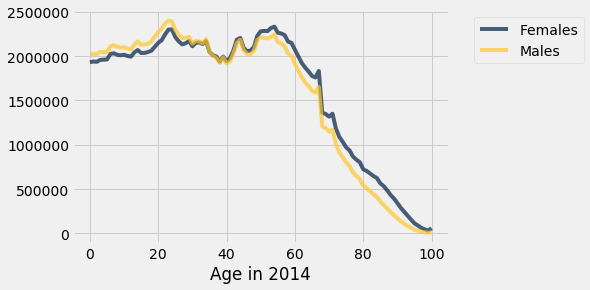

In [13]:
Table().with_columns(
    'Age in 2014', females.column('AGE'),
    'Females', females.column('2014'),
    'Males', males.column('2014'),
).plot('Age in 2014')

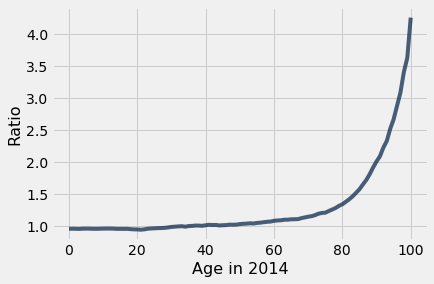

In [14]:
Table().with_columns(
    'Age in 2014', females.column('AGE'),
    'Ratio', females.column('2014') / males.column('2014'),
).plot('Age in 2014')

In [15]:
females.where('Change', are.above(350000)).sort('AGE').show()

SEX,AGE,2010,2014,Change,Growth
2,64,"1,414,220","1,826,662","412,442",6.61%
2,65,"1,405,839","1,776,761","370,922",6.03%
2,66,"1,381,541","1,758,649","377,108",6.22%
2,67,"1,423,561","1,832,245","408,684",6.51%


In [16]:
females.where('AGE', are.between(55, 70)).show()

SEX,AGE,2010,2014,Change,Growth
2,55,"2,183,762","2,263,367","79,605",0.90%
2,56,"2,108,681","2,254,749","146,068",1.69%
2,57,"2,036,520","2,237,030","200,510",2.38%
2,58,"1,963,764","2,163,798","200,034",2.45%
2,59,"1,914,772","2,148,517","233,745",2.92%
2,60,"1,874,501","2,071,358","196,857",2.53%
2,61,"1,828,708","1,997,348","168,640",2.23%
2,62,"1,815,999","1,922,318","106,319",1.43%
2,63,"1,898,260","1,870,552","-27,708",-0.37%
2,64,"1,414,220","1,826,662","412,442",6.61%


In [ ]:
#expectations from project

#select/create dataset from anything in your personal interest
# define research questions
# define plan of action
# data wrangling demonstrations
# data cleaning demonstrations
# data visualization demonstrations

#outcomes:

#well defined research questions with literature review
#well defined, simple and measurable plan of action
#writing about data wrangling and data cleaning
#effective and well placed data visualizations 
#writing about making inferences about research questions based on data visualizations 